## Paquetes

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow

## Análisis de datos

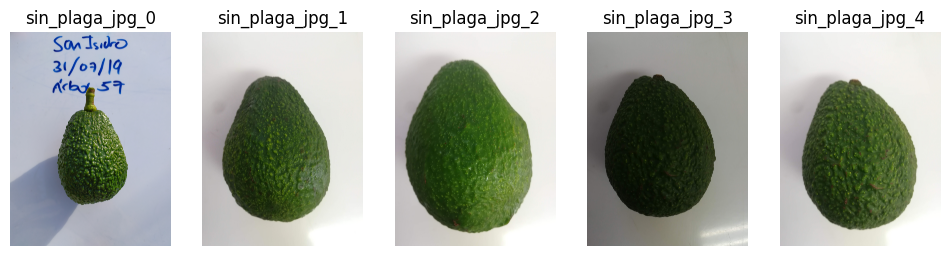

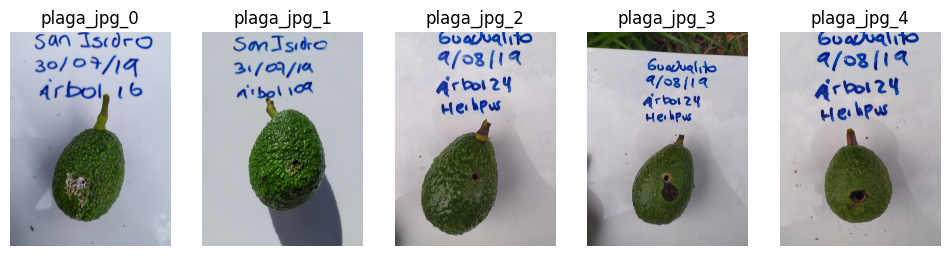

In [77]:
input_dir = r"D:\proyectoGrado\DatosAguacate"
categories = ['sin_plaga', 'plaga']

# Cargar imágenes de muestra
sample_images = []

# Función para visualizar varias imágenes
def visualize_images(images, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(titles[i])
    plt.show()

# Exploración de imágenes
for category in categories:
    category_images = []
    category_titles = []
    for i, file in enumerate(os.listdir(os.path.join(input_dir, category))):
        img_path = os.path.join(input_dir, category, file)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        category_images.append(img_rgb)
        category_titles.append(f"{category}_{i}")
    sample_images.extend(category_images)
    visualize_images(category_images[:5], category_titles[:5], 1, 5)

## Visualización de tamaños de imágenes

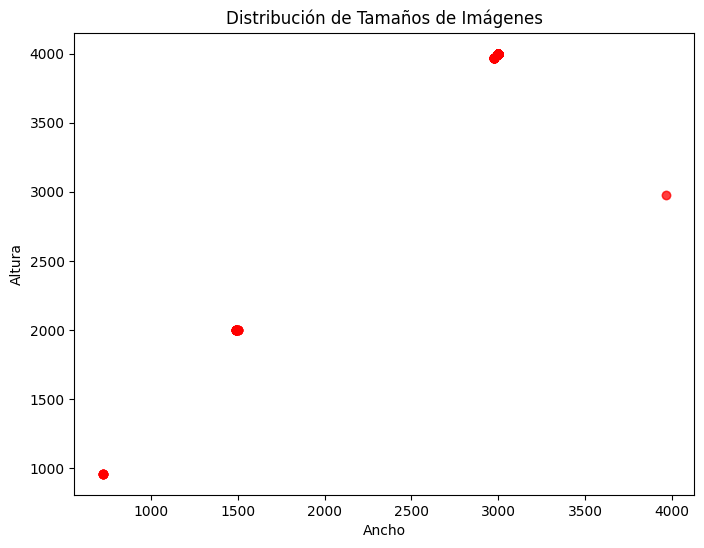

In [78]:
image_sizes = [img.shape[:2] for img in sample_images]
image_sizes = np.asarray(image_sizes)
plt.figure(figsize=(8, 6))
plt.scatter(image_sizes[:, 1], image_sizes[:, 0], c='red', alpha=0.5)
plt.title('Distribución de Tamaños de Imágenes')
plt.xlabel('Ancho')
plt.ylabel('Altura')
plt.show()

## Distribución de las imágenes

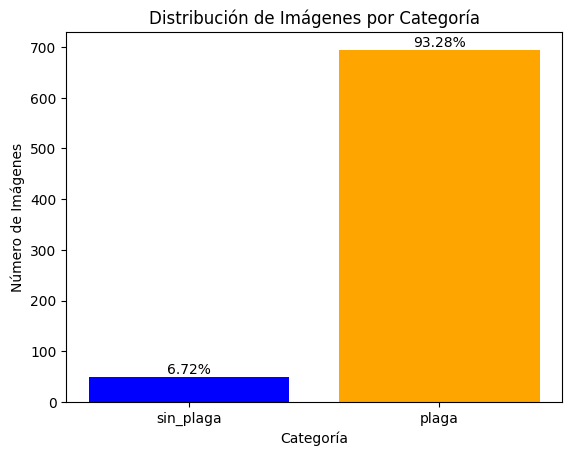

In [60]:
# Contadores para las clases
images_per_category = []
num_images_per_category = {category: 0 for category in categories}

# Contar el número de imágenes por categoría
total_images = 0
for category in categories:
    category_path = os.path.join(input_dir, category)
    num_images = len(os.listdir(category_path))
    images_per_category.append(num_images)
    total_images += num_images
    num_images_per_category[category] += num_images

# Calcular porcentajes
percentage_per_category = {category: (num_images / total_images) * 100 
                           for category, num_images in num_images_per_category.items()}

# Visualizar la distribución de clases con porcentajes
fig, ax = plt.subplots()
bars = ax.bar(categories, images_per_category, color=['blue', 'orange'])

# Etiquetas de porcentaje en las barras
for bar, (category, percentage) in zip(bars, percentage_per_category.items()):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Distribución de Imágenes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Imágenes')
plt.show()

## Distribución por alto y ancho de las imágenes

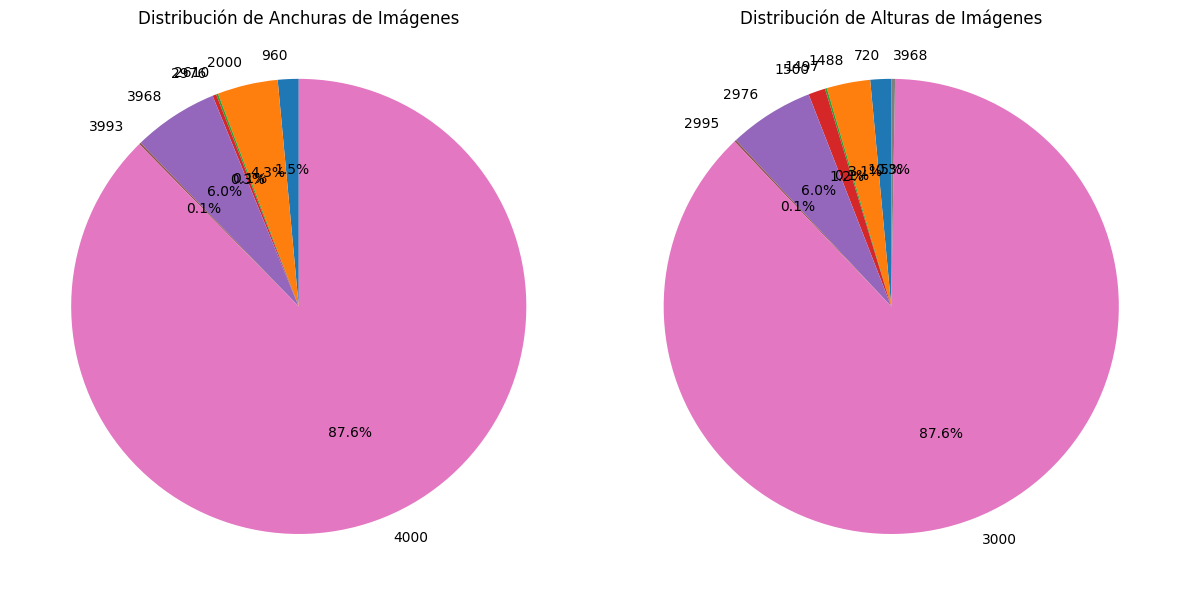

In [76]:
# Inicializar diccionarios para el recuento de anchuras y alturas
width_counts = {}
height_counts = {}

# Contar las ocurrencias de anchuras y alturas
for width, height in image_sizes:
    if width in width_counts:
        width_counts[width] += 1
    else:
        width_counts[width] = 1
    
    if height in height_counts:
        height_counts[height] += 1
    else:
        height_counts[height] = 1

# Calcular los porcentajes de anchuras y alturas
total_images = len(image_sizes)
percentage_widths = [(width, count / total_images * 100) for width, count in width_counts.items()]
percentage_heights = [(height, count / total_images * 100) for height, count in height_counts.items()]

# Ordenar por anchuras y alturas para la consistencia del gráfico
percentage_widths.sort(key=lambda x: x[0])
percentage_heights.sort(key=lambda x: x[0])

# Crear el pie chart para la distribución de anchos
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
wedges, _ = plt.pie([count for _, count in percentage_widths], labels=None, startangle=90)
plt.title('Distribución de Anchuras de Imágenes')
plt.legend([f'{width} ({count:0.1f}%)' for width, count in percentage_widths], loc="best")
plt.axis('equal')  # Hace que el gráfico sea un círculo.

# Crear el pie chart para la distribución de altos
plt.subplot(1, 2, 2)
wedges, _ = plt.pie([count for _, count in percentage_heights], labels=None, startangle=90)
plt.title('Distribución de Alturas de Imágenes')
plt.legend([f'{height} ({count:0.1f}%)' for height, count in percentage_heights], loc="best")
plt.axis('equal')  # Hace que el gráfico sea un círculo.

plt.tight_layout()
plt.show()